In [76]:
from lightgbm import LGBMClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [77]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_va, y_train, y_va = train_test_split(X_1, y_1)

print(X_train.shape, y_train.shape)
print(np.unique(y_train))  # 7分类任务

(2025, 54) (2025,)
[1 2 3 4 5 6 7]


In [78]:
enc = OrdinalEncoder()

# y*.shape = (num_sample, )
y_train_enc = enc.fit_transform(y_train.reshape(-1, 1)).reshape(-1, )
y_test_enc = enc.transform(y_test.reshape(-1, 1)).reshape(-1, )
y_va_enc = enc.fit_transform(y_va.reshape(-1, 1)).reshape(-1, )
print(np.unique(y_train_enc))
print(y_train_enc.shape)

[0. 1. 2. 3. 4. 5. 6.]
(2025,)


In [79]:
# 不需要指定num_class参数
model = LGBMClassifier(
    boosting_type='gbdt',  # 对应boosting
    objective='multiclass',
    n_jobs=-1,
    max_depth=-1,
    min_child_weight=1e-3,
    min_child_samples=20,
    num_leaves=31,
    subsample=1.0,
    subsample_freq=0,
    learning_rate=0.1,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    n_estimators=100)

In [80]:
model.fit(X_train, y_train_enc,
          eval_set=[(X_train, y_train_enc), (X_va, y_va_enc)],  # 对应valid_sets
          verbose=10,  # 对应verbose_eval
          sample_weight=1 / (1 + y_train_enc),  # 对应Dataset(weight)
          eval_metric='multiclass',  # 对应metric+feval
          early_stopping_rounds=100,
          categorical_feature=[0, 1]  # 对应Dataset(categorical_feature)
          )

Training until validation scores don't improve for 100 rounds
[10]	training's multi_logloss: 0.532295	valid_1's multi_logloss: 0.768753
[20]	training's multi_logloss: 0.309407	valid_1's multi_logloss: 0.593114


C:\Users\duanm\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\duanm\anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1]
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\duanm\anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\duanm\anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[30]	training's multi_logloss: 0.183876	valid_1's multi_logloss: 0.518411
[40]	training's multi_logloss: 0.11591	valid_1's multi_logloss: 0.496033
[50]	training's multi_logloss: 0.0740594	valid_1's multi_logloss: 0.494165
[60]	training's multi_logloss: 0.0482612	valid_1's multi_logloss: 0.499461
[70]	training's multi_logloss: 0.0321354	valid_1's multi_logloss: 0.503285
[80]	training's multi_logloss: 0.0214905	valid_1's multi_logloss: 0.510337
[90]	training's multi_logloss: 0.0148172	valid_1's multi_logloss: 0.520351
[100]	training's multi_logloss: 0.0103895	valid_1's multi_logloss: 0.52969
Did not meet early stopping. Best iteration is:
[100]	training's multi_logloss: 0.0103895	valid_1's multi_logloss: 0.52969


LGBMClassifier(objective='multiclass')

In [81]:
# 预测结果(num_sample, )
model.predict(X_test)

array([0., 1., 4., 6., 4., 2., 0., 0., 0., 0., 1., 4., 1., 1., 4., 5., 1.,
       4., 4., 0., 4., 1., 4., 1., 0., 1., 4., 4., 1., 1., 1., 1., 2., 2.,
       3., 0., 4., 4., 2., 5., 5., 4., 4., 1., 4., 2., 1., 0., 4., 4., 1.,
       4., 0., 0., 4., 1., 0., 4., 4., 1., 4., 1., 0., 5., 3., 4., 5., 6.,
       4., 5., 5., 4., 0., 1., 1., 0., 1., 1., 2., 0., 2., 5., 4., 4., 1.,
       1., 1., 5., 1., 1., 6., 4., 4., 0., 1., 4., 5., 4., 0., 4., 0., 1.,
       4., 1., 1., 4., 4., 4., 3., 3., 4., 0., 4., 0., 0., 0., 4., 1., 6.,
       5., 1., 4., 0., 4., 0., 1., 4., 5., 1., 1., 2., 1., 0., 1., 1., 1.,
       0., 5., 3., 0., 1., 6., 0., 4., 4., 2., 5., 1., 3., 4., 1., 0., 1.,
       1., 0., 2., 3., 5., 1., 2., 1., 1., 2., 4., 0., 5., 1., 4., 1., 1.,
       4., 1., 3., 4., 1., 2., 4., 1., 4., 1., 0., 2., 1., 2., 4., 1., 0.,
       0., 6., 1., 1., 1., 1., 2., 0., 4., 4., 1., 0., 5., 0., 1., 4., 0.,
       1., 4., 1., 2., 1., 0., 4., 1., 4., 5., 0., 4., 1., 3., 5., 6., 4.,
       3., 4., 1., 4., 1.

In [82]:
# 预测结果的概率矩阵
model.predict_proba(X_test)

array([[9.64506240e-01, 3.51386995e-02, 4.97231830e-06, ...,
        3.42606222e-04, 3.20523369e-06, 2.38044475e-06],
       [5.21815124e-02, 9.47805245e-01, 2.10521264e-06, ...,
        7.29258695e-06, 1.36044895e-06, 1.70660882e-06],
       [4.65661300e-05, 6.11620279e-04, 1.67220921e-07, ...,
        9.99269467e-01, 7.20629245e-05, 6.06993679e-08],
       ...,
       [1.73044141e-05, 2.45929546e-04, 9.99156016e-01, ...,
        9.13574518e-05, 4.89007063e-04, 7.90035515e-08],
       [2.49235340e-06, 4.83272661e-04, 2.31771555e-07, ...,
        9.99513893e-01, 4.81639516e-08, 2.45795787e-08],
       [5.03581038e-06, 9.79503269e-05, 4.03500818e-05, ...,
        1.56359250e-05, 1.10727284e-04, 4.38438616e-08]])

In [83]:
# 准确率
model.score(X_test, y_test)

0.056666666666666664

In [84]:
# 对应vals_result
model.evals_result_

{'training': OrderedDict([('multi_logloss',
               [1.1431899551683393,
                1.007129584714289,
                0.9084313797930694,
                0.8271429661377983,
                0.7595225209717039,
                0.7027433523225006,
                0.6509901876121238,
                0.605996532718441,
                0.5676016347037635,
                0.532294896900631,
                0.5002977320821536,
                0.47107692852215105,
                0.4457335286877628,
                0.42181505695042526,
                0.4002445773917444,
                0.3804371718026125,
                0.3622176474730074,
                0.3431931921247783,
                0.3266988080694563,
                0.3094068143010768,
                0.2923750036960234,
                0.27805304985744395,
                0.26387897742229693,
                0.25112118740931816,
                0.23817293701003112,
                0.2265395549255549,
                0

In [85]:
# 特征相对重要性
model.feature_importances_

array([  93,  177, 1095, 2214, 1803, 3768, 1962, 1972, 1751, 3511,  197,
          0,   85,  201,  177,   44,    0,    0,   46,    0,    0,    0,
          0,  102,    0,  221,   35,    0,    0,    0,   28,   32,   28,
         95,    0,  114,   82,   25,    0,    0,    0,    0,  220,  170,
         32,   20,   28,    0,    0,    0,    0,  150,  170,    0])

In [86]:
# The underlying Booster of this model.
model.booster_

In [87]:
# 保存训练好的模型
model.booster_.save_model("lgb1.model")

In [88]:
import lightgbm as lgb

# 加载训练好的模型
bst = lgb.Booster(model_file='lgb1.model')
bst

In [89]:
bst.predict(X_test) - model.predict_proba(X_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

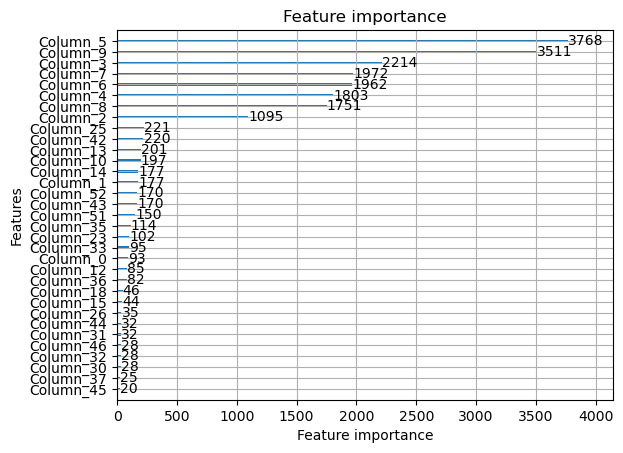

In [90]:
import matplotlib.pyplot as plt

# 绘制特征的相对重要性
lgb.plot_importance(model)
plt.show()

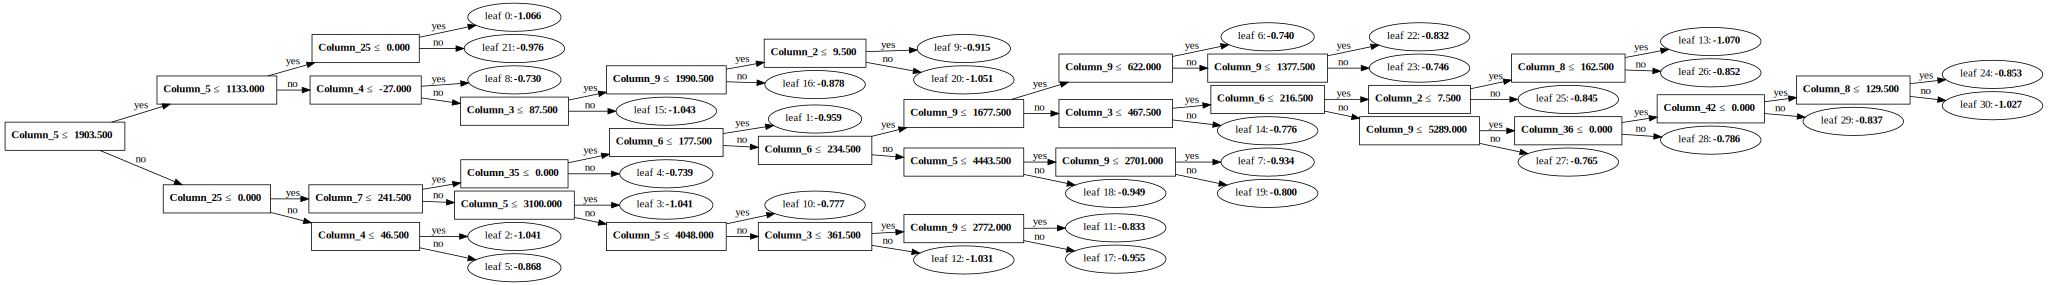

In [91]:
# 可视化lgb分割过程
lgb.create_tree_digraph(model)

